Import Packages


In [34]:
import pandas as pd
import numpy as np
from sklearn.impute  import KNNImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
cols_to_use = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF',  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
    'SalePrice'
]

In [16]:
datset=pd.read_csv("/content/kaggle_house_pred_train.csv",usecols=cols_to_use)

In [17]:
lst_missing_cols=[feat for feat in datset[cols_to_use] if datset[feat].isnull().sum()>1]
lst_missing_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Split the dataset into Train and test groups

In [18]:
X_train,X_test,y_train,y_test=train_test_split(datset[cols_to_use].drop('SalePrice',axis=1),
    datset['SalePrice'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train.head(5)

In [20]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

# Settings for Imputation

In [22]:
imputer=KNNImputer(n_neighbors=5, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
    )

In [23]:
imputer.fit(X_train)

KNNImputer(weights='distance')

In [28]:
train_t=imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [29]:
train_t=pd.DataFrame(train_t,columns=X_train.columns)
test_t=pd.DataFrame(test_t,columns=X_test.columns)

In [43]:
train_t['GarageYrBlt'].skew(),X_train['GarageYrBlt'].skew()

(-0.5983176625686123, -0.6669763943317643)

In [ ]:
X_train.isnull().sum()

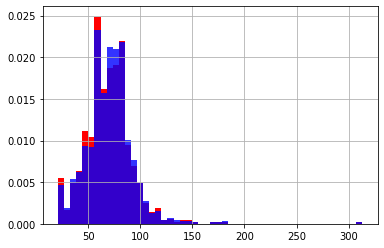

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].hist(bins=50, ax=ax, density=True, color='red')
train_t['LotFrontage'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)


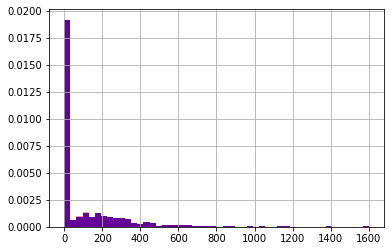

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['MasVnrArea'].hist(bins=50, ax=ax, density=True, color='blue')
train_t['MasVnrArea'].hist(bins=50, ax=ax, color='red', density=True, alpha=0.4)

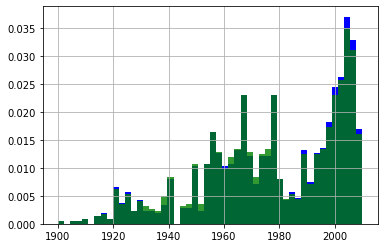

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['GarageYrBlt'].hist(bins=50, ax=ax, density=True, color='blue')
train_t['GarageYrBlt'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)